In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,  OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler,  OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV , RepeatedKFold#GridSearch is for hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [66]:
# import dataset

df = pd.read_csv('https://raw.githubusercontent.com/neilaxu/schulich_data_science/main/MBAN%206750%20HW/Employee_Attrition_Data_Set(1).csv')

In [67]:
df.head()

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition
0,1,50,Male,HR,IT,11547,12,1,12.288783,41.307654,9,1,No
1,2,36,Male,Sales,Support,8643,28,4,3.496371,44.733204,8,1,Yes
2,3,29,Male,Technician,HR,12418,12,4,4.796945,18.646876,1,3,No
3,4,42,Male,Technician,Support,11441,25,1,10.310471,15.790848,8,4,No
4,5,40,Female,Engineer,Sales,9178,25,2,6.210127,41.239179,6,4,No


In [68]:
clean_data = df

In [69]:
clean_data.columns

Index(['Employee ID', 'Age', 'Gender', 'Job Role', 'Department',
       'Monthly Income', 'Years at Company', 'Number of Promotions',
       'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction',
       'Performance Rating', 'Attrition'],
      dtype='object')

Number of Promotions 6
Job Satisfaction 10
Performance Rating 5


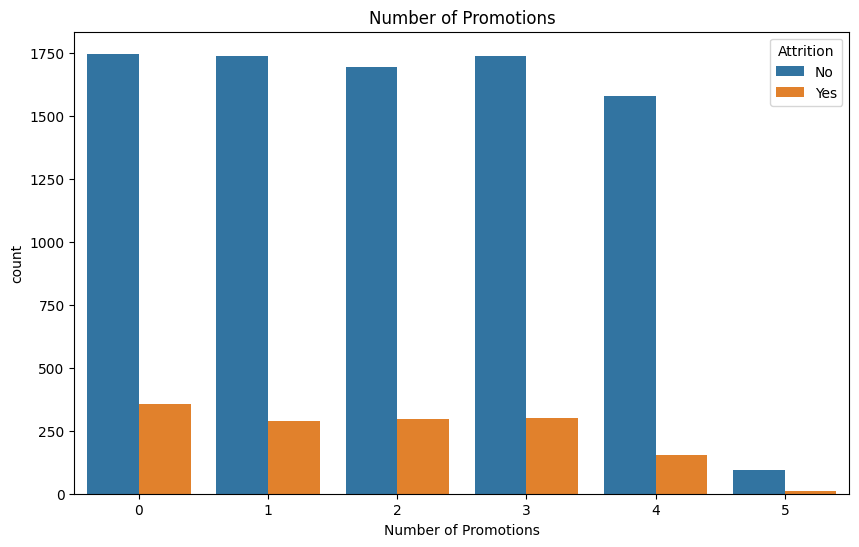

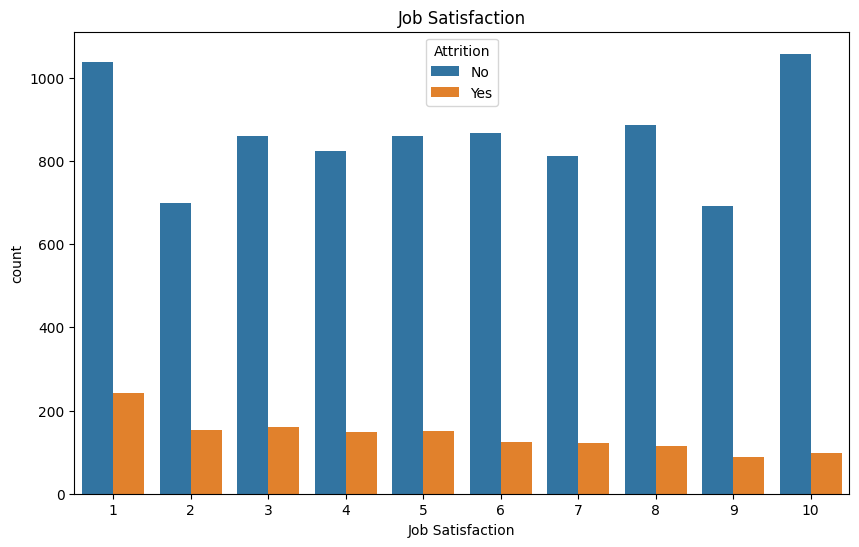

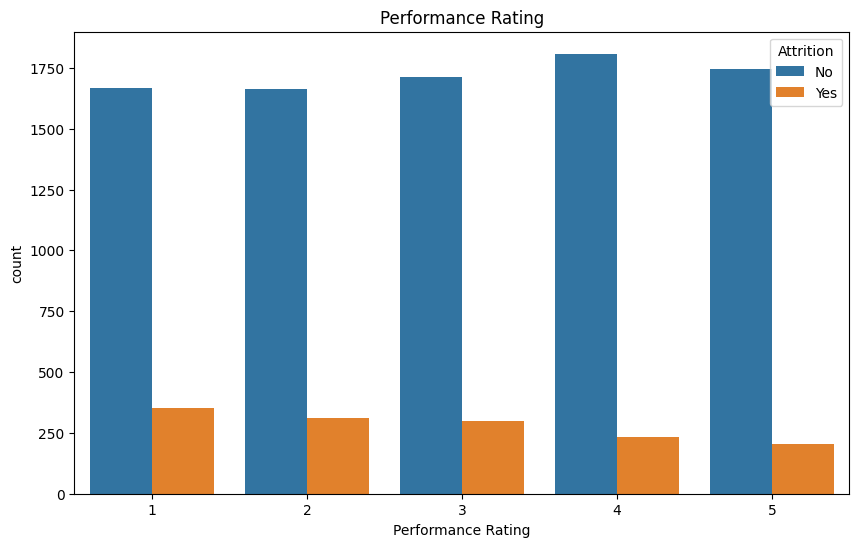

In [70]:
num_feature=[feature for feature in df.columns if df[feature].dtypes!='object']
disc_num_feature=[feature for feature in num_feature if len(df[feature].unique())<25]
for feature in disc_num_feature:
    print(feature,len(df[feature].unique()))
# disc_num_feature is a list of discrete numerical feature names
for feature in disc_num_feature:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[feature], hue=df['Attrition'])
    plt.title(feature)
    plt.show()

/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_28867/2393665368.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(clean_data.loc[(clean_data['Attrition'] == 'Yes'), 'Distance from Office'] , color='r',shade=True)
/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_28867/2393665368.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(clean_data.loc[(clean_data['Attrition'] == 'No'),'Distance from Office'] , color='b',shade=True)


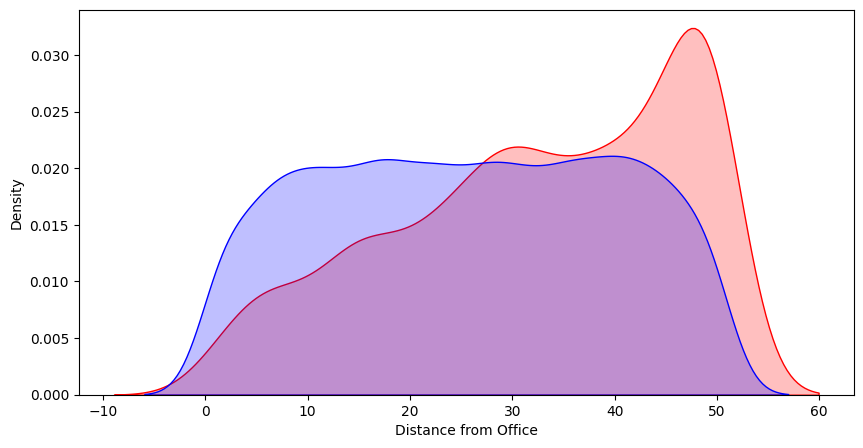

In [71]:
# Does Arrival Delay and Departure Delay affect satisfaction? In the same way?
fig = plt.figure(figsize=(10,5))
ax=sns.kdeplot(clean_data.loc[(clean_data['Attrition'] == 'Yes'), 'Distance from Office'] , color='r',shade=True)
ax=sns.kdeplot(clean_data.loc[(clean_data['Attrition'] == 'No'),'Distance from Office'] , color='b',shade=True)

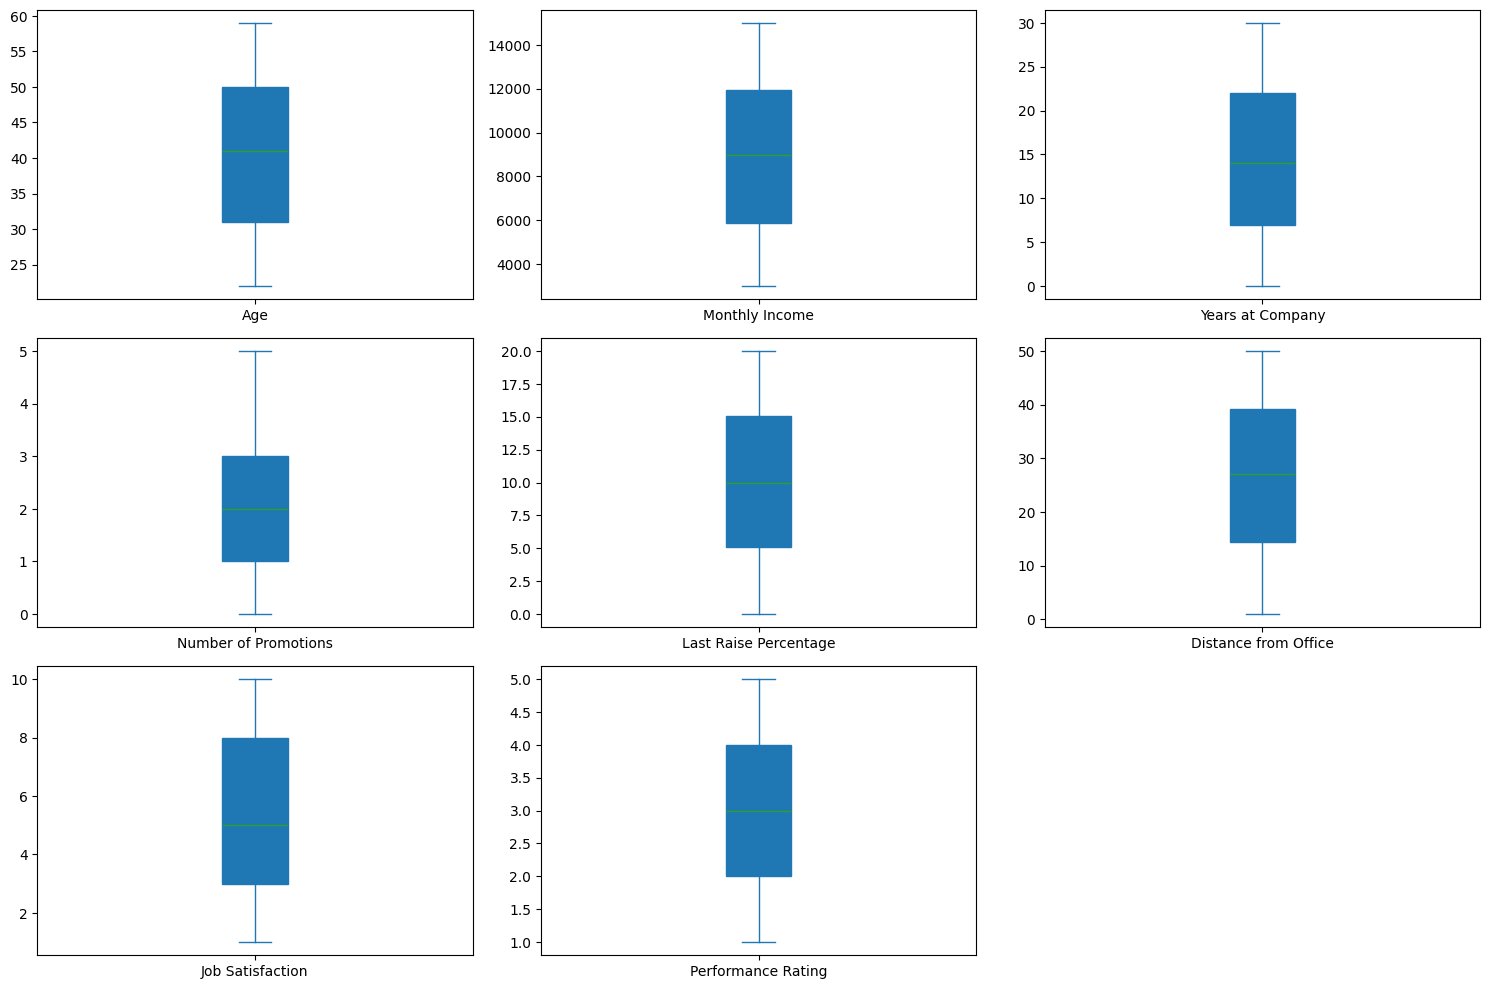

In [72]:
## several Boxplot in one graph
# List of variables of interest
variables_of_interest = ['Age', 'Monthly Income', 'Years at Company', 'Number of Promotions',
       'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction',
       'Performance Rating']

# Create boxplots for each specified variable
clean_data[variables_of_interest].plot(kind="box", subplots=True, layout=(3, 3), figsize=(15, 10), patch_artist=True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

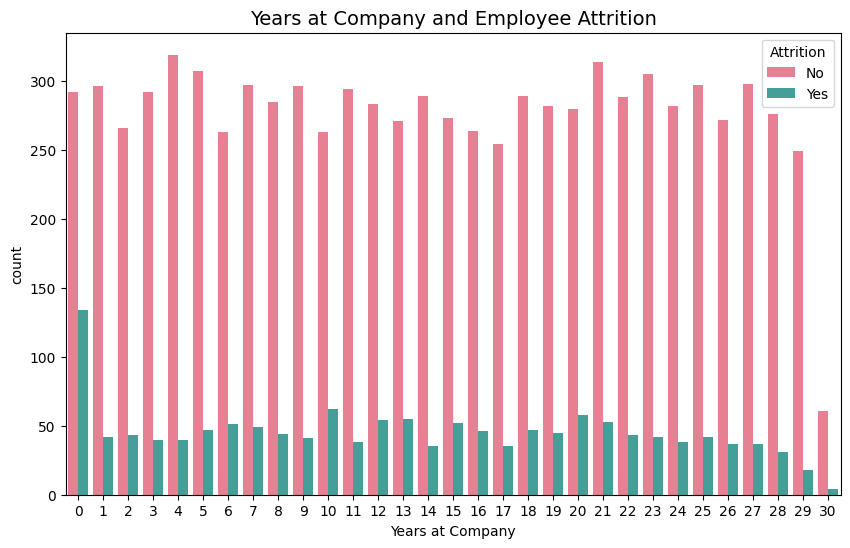

In [73]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Years at Company', hue='Attrition', palette='husl')  # Changed to 'husl'
plt.title('Years at Company and Employee Attrition', fontsize=14)
plt.show()


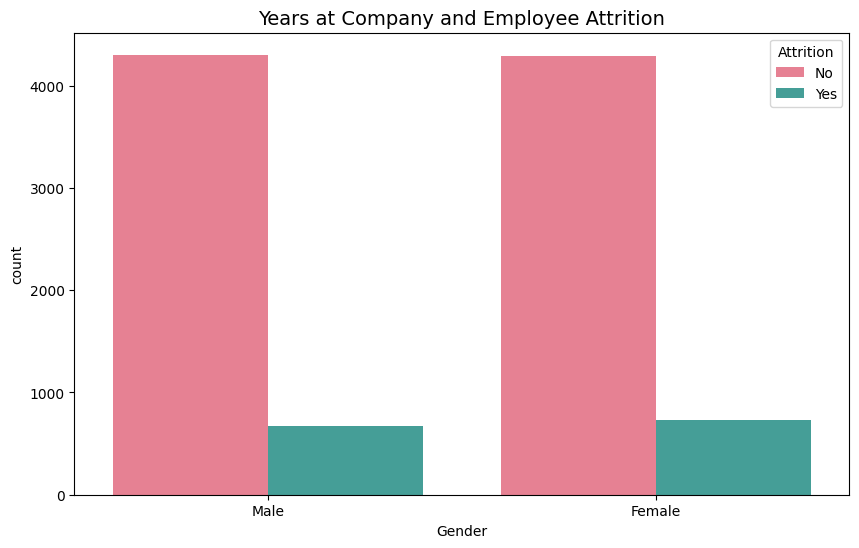

In [74]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Gender', hue='Attrition', palette='husl')  # Changed to 'husl'
plt.title('Years at Company and Employee Attrition', fontsize=14)
plt.show()

In [75]:
clean_data.columns

Index(['Employee ID', 'Age', 'Gender', 'Job Role', 'Department',
       'Monthly Income', 'Years at Company', 'Number of Promotions',
       'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction',
       'Performance Rating', 'Attrition'],
      dtype='object')

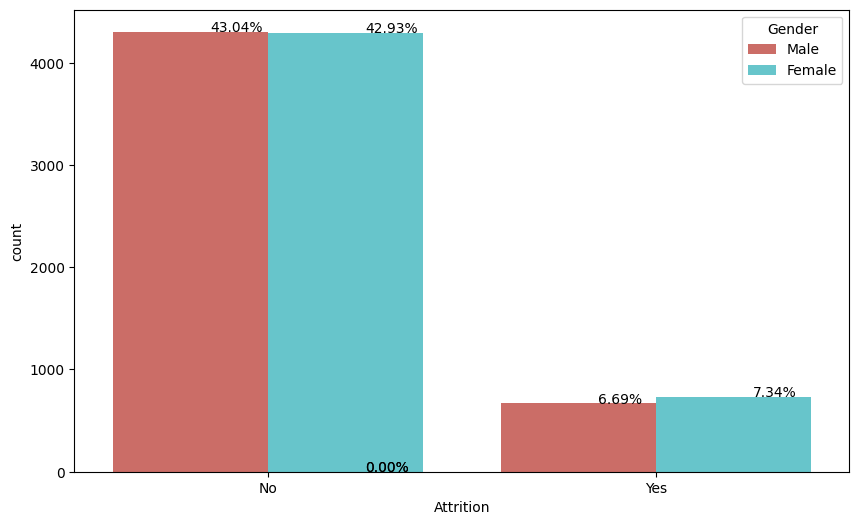

In [76]:
# Does gender affect satisfaction?
plt.figure(figsize = (10,6))
x=sns.countplot(data=clean_data,x='Attrition',hue='Gender',palette='hls')
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/clean_data.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()
# ---> Gender doesn't affect the passengers' satisfaction

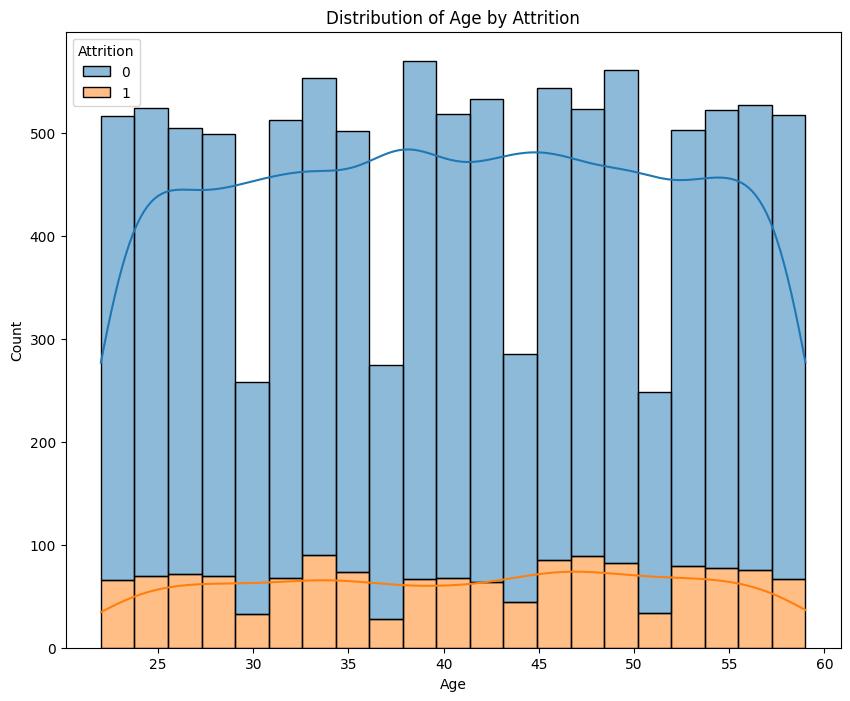

In [117]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', kde=True)
plt.title('Distribution of Age by Attrition')
plt.show()

In [77]:
clean_data.columns

Index(['Employee ID', 'Age', 'Gender', 'Job Role', 'Department',
       'Monthly Income', 'Years at Company', 'Number of Promotions',
       'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction',
       'Performance Rating', 'Attrition'],
      dtype='object')

In [78]:
# Convert categorical data to numeric
Gender_le = LabelEncoder()
Job_Role_le = LabelEncoder()
Department_le = LabelEncoder()
Attrition_le = LabelEncoder()

clean_data['Gender'] = Gender_le.fit_transform(clean_data['Gender'])
clean_data['Job Role'] = Job_Role_le.fit_transform(clean_data['Job Role'])
clean_data['Department'] = Department_le.fit_transform(clean_data['Department'])
clean_data['Attrition'] = Attrition_le.fit_transform(clean_data['Attrition'])

In [79]:
clean_data.head()

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition
0,1,50,1,1,2,11547,12,1,12.288783,41.307654,9,1,0
1,2,36,1,3,4,8643,28,4,3.496371,44.733204,8,1,1
2,3,29,1,4,1,12418,12,4,4.796945,18.646876,1,3,0
3,4,42,1,4,4,11441,25,1,10.310471,15.790848,8,4,0
4,5,40,0,0,3,9178,25,2,6.210127,41.239179,6,4,0


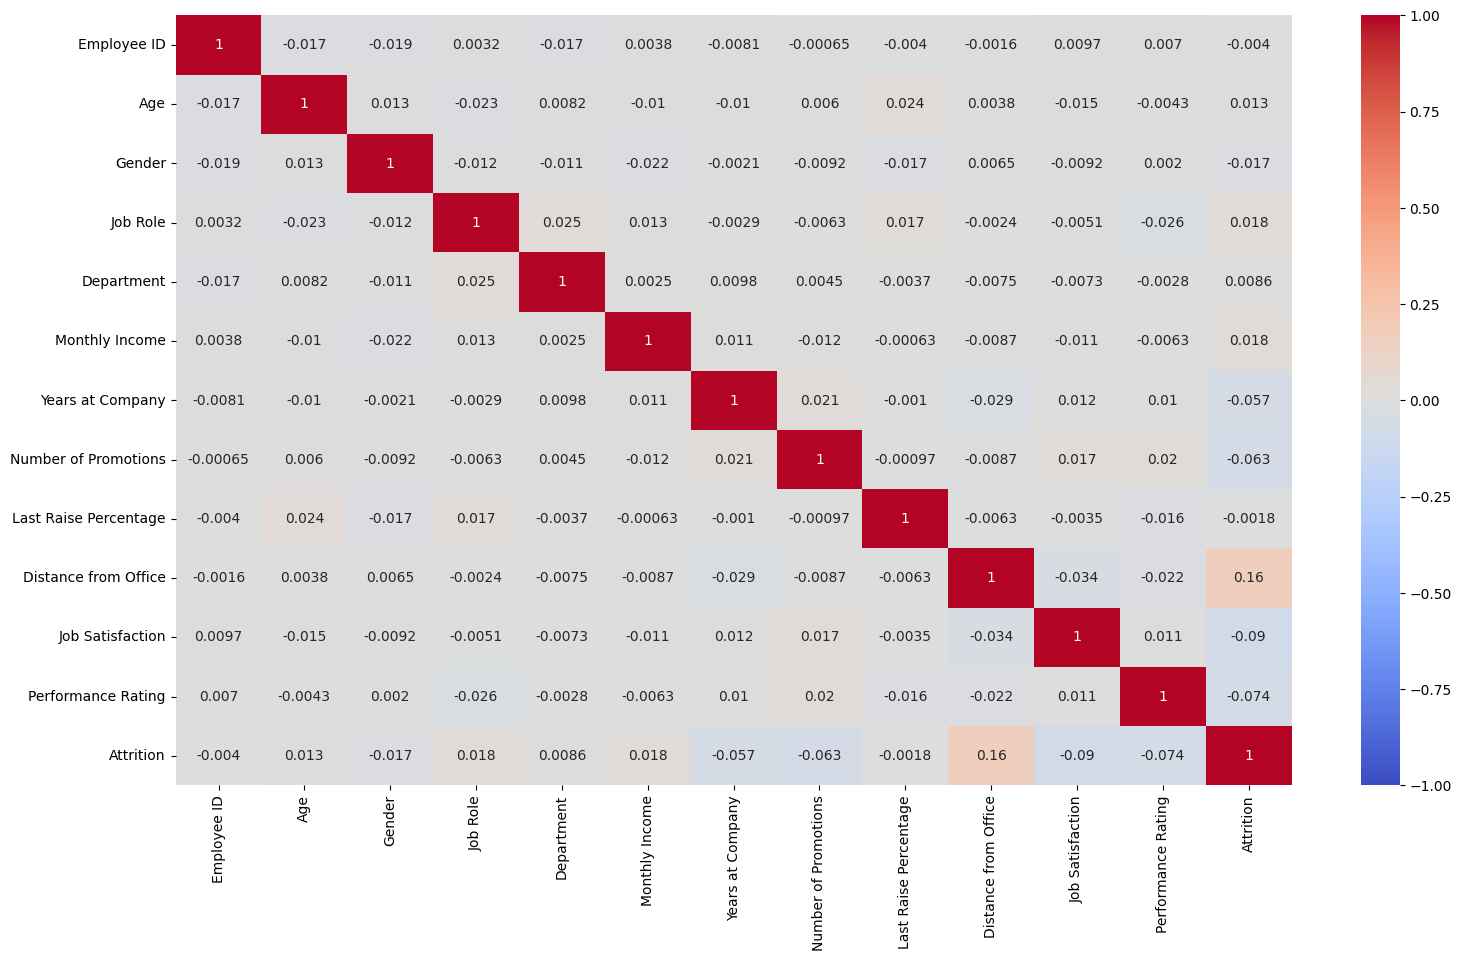

In [80]:
# Set the figure size for the heatmap
plt.figure(figsize=(18, 10))

# Create the heatmap
sns.heatmap(clean_data.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

# Display the plot
plt.show()

In [81]:
clean_data.columns

Index(['Employee ID', 'Age', 'Gender', 'Job Role', 'Department',
       'Monthly Income', 'Years at Company', 'Number of Promotions',
       'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction',
       'Performance Rating', 'Attrition'],
      dtype='object')

In [82]:
#model

In [83]:
clean_data.head()

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition
0,1,50,1,1,2,11547,12,1,12.288783,41.307654,9,1,0
1,2,36,1,3,4,8643,28,4,3.496371,44.733204,8,1,1
2,3,29,1,4,1,12418,12,4,4.796945,18.646876,1,3,0
3,4,42,1,4,4,11441,25,1,10.310471,15.790848,8,4,0
4,5,40,0,0,3,9178,25,2,6.210127,41.239179,6,4,0


In [84]:
## split data into X variables and y variable

X = clean_data[['Age', 'Gender', 'Job Role', 'Department',
       'Monthly Income', 'Years at Company', 'Number of Promotions',
       'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction',
       'Performance Rating']]
y = clean_data['Attrition']

In [85]:
# reserve 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [86]:
# demonstrate what MinMaxScaler() does
MinMaxScaler().fit_transform(clean_data[['Age', 'Monthly Income', 'Years at Company', 'Number of Promotions',
       'Last Raise Percentage', 'Distance from Office']])

array([[0.75675676, 0.71230936, 0.4       , 0.2       , 0.61443914,
        0.82260519],
       [0.37837838, 0.47028919, 0.93333333, 0.8       , 0.17481855,
        0.89251436],
       [0.18918919, 0.78489874, 0.4       , 0.8       , 0.23984725,
        0.36014033],
       ...,
       [0.35135135, 0.8084007 , 0.03333333, 0.        , 0.00145795,
        0.24386757],
       [0.83783784, 0.75114593, 0.7       , 0.6       , 0.10531889,
        1.        ],
       [0.67567568, 0.17793149, 0.3       , 0.        , 0.34786377,
        0.36390293]])

In [87]:
# Define columns
numeric_columns = ['Age', 'Monthly Income', 'Years at Company', 'Number of Promotions',
       'Last Raise Percentage', 'Distance from Office']
categorical_columns = ['Gender', 'Job Role', 'Department']
ordinal_columns = ['Job Satisfaction',
       'Performance Rating']

In [88]:
# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('ord', OrdinalEncoder(), ordinal_columns)
    ]
)

In [109]:
# we are going to test 3 models with cross validation to see which ones work best for this data
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
logreg = LogisticRegression()
nb = GaussianNB()
dt = DecisionTreeClassifier()

In [110]:
# Define scoring functions
scoring = {
    'accuracy': make_scorer(accuracy_score), 
    'recall': make_scorer(recall_score, average='weighted'),
    'precision': make_scorer(precision_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

In [111]:
# Cross-validation evaluation for KNN model
knn_scores = cross_validate(knn, X_train, y_train, scoring=scoring, cv=5)
knn_accuracy = np.mean(knn_scores['test_accuracy'])
knn_recall = np.mean(knn_scores['test_recall'])
knn_precision = np.mean(knn_scores['test_precision'])
knn_f1 = np.mean(knn_scores['test_f1'])

# Cross-validation evaluation for Logistic Regression model
logreg_scores = cross_validate(logreg, X_train, y_train, scoring=scoring, cv=5)
logreg_accuracy = np.mean(logreg_scores['test_accuracy'])
logreg_recall = np.mean(logreg_scores['test_recall'])
logreg_precision = np.mean(logreg_scores['test_precision'])
logreg_f1 = np.mean(logreg_scores['test_f1'])

# Cross-validation evaluation for Naive Bayes model
nb_scores = cross_validate(nb, X_train, y_train, scoring=scoring, cv=5)
nb_accuracy = np.mean(nb_scores['test_accuracy'])
nb_recall = np.mean(nb_scores['test_recall'])
nb_precision = np.mean(nb_scores['test_precision'])
nb_f1 = np.mean(nb_scores['test_f1'])

# Cross-validation evaluation for Random Forest model
rf_scores = cross_validate(rf, X_train, y_train, scoring=scoring, cv=5)
rf_accuracy = np.mean(rf_scores['test_accuracy'])
rf_recall = np.mean(rf_scores['test_recall'])
rf_precision = np.mean(rf_scores['test_precision'])
rf_f1 = np.mean(rf_scores['test_f1'])


# Cross-validation evaluation for Decision Tree model
dt_scores = cross_validate(dt, X_train, y_train, scoring=scoring, cv=5)
dt_accuracy = np.mean(dt_scores['test_accuracy'])
dt_recall = np.mean(dt_scores['test_recall'])
dt_precision = np.mean(dt_scores['test_precision'])
dt_f1 = np.mean(dt_scores['test_f1'])

/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [112]:
print(f"Random Forest Mean Accuracy: {rf_accuracy}")
print(f"Random Forest Mean Recall: {rf_recall}")
print(f"Random Forest Mean Precision: {rf_precision}")
print(f"Random Forest Mean F1 Score: {rf_f1}")

print(f"KNN Mean Accuracy: {knn_accuracy}")
print(f"KNN Mean Recall: {knn_recall}")
print(f"KNN Mean Precision: {knn_precision}")
print(f"KNN Mean F1 Score: {knn_f1}")

print(f"Logistic Regression Mean Accuracy: {logreg_accuracy}")
print(f"Logistic Regression Mean Recall: {logreg_recall}")
print(f"Logistic Regression Mean Precision: {logreg_precision}")
print(f"Logistic Regression Mean F1 Score: {logreg_f1}")

print(f"Naive Bayes Mean Accuracy: {nb_accuracy}")
print(f"Naive Bayes Mean Recall: {nb_recall}")
print(f"Naive Bayes Mean Precision: {nb_precision}")
print(f"Naive Bayes Mean F1 Score: {nb_f1}")

print(f"Decision Tree Mean Accuracy: {dt_accuracy}")
print(f"Decision Tree Mean Recall: {dt_recall}")
print(f"Decision Tree Mean Precision: {dt_precision}")
print(f"Decision Tree Mean F1 Score: {dt_f1}")


Random Forest Mean Accuracy: 0.8632857142857142
Random Forest Mean Recall: 0.8632857142857142
Random Forest Mean Precision: 0.8255701734573726
Random Forest Mean F1 Score: 0.8169183431257659
KNN Mean Accuracy: 0.8477142857142856
KNN Mean Recall: 0.8477142857142856
KNN Mean Precision: 0.7765984973539881
KNN Mean F1 Score: 0.7997620514846058
Logistic Regression Mean Accuracy: 0.8611428571428572
Logistic Regression Mean Recall: 0.8611428571428572
Logistic Regression Mean Precision: 0.8173910120832504
Logistic Regression Mean F1 Score: 0.7986399032494778
Naive Bayes Mean Accuracy: 0.8615714285714284
Naive Bayes Mean Recall: 0.8615714285714284
Naive Bayes Mean Precision: 0.7697397692038189
Naive Bayes Mean F1 Score: 0.7977855820523836
Decision Tree Mean Accuracy: 0.7681428571428572
Decision Tree Mean Recall: 0.7681428571428572
Decision Tree Mean Precision: 0.7839545931876017
Decision Tree Mean F1 Score: 0.7756551139875947


In [95]:
# Fit the Random Forest model on the training data
knn.fit(X_train, y_train)

# Now you can make predictions on the test data
y_pred = knn.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.98      0.91      2568
           1       0.21      0.04      0.07       432

    accuracy                           0.84      3000
   macro avg       0.54      0.51      0.49      3000
weighted avg       0.76      0.84      0.79      3000



In [ ]:
## KNN 

In [96]:
# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test)

In [97]:
# Create a pipeline with a preprocessor and KNN model
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])


# Define hyperparameter grid
param_grid = {
    'classifier__n_neighbors': [5, 7, 9, 15, 35, 45, 55],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Use GridSearchCV to find the best hyperparameter combination
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

# Output the best hyperparameter combination
print("Best hyperparameters for KNN:", grid_search.best_params_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best hyperparameters for KNN: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 5, 'classifier__weights': 'distance'}


/Users/owner/Library/Python/3.9/lib/python/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [100]:
# Build the final KNN model using the best hyperparameters
final_classifier = KNeighborsClassifier(
    n_neighbors=grid_search.best_params_['classifier__n_neighbors'],
    metric=grid_search.best_params_['classifier__metric'],
    weights=grid_search.best_params_['classifier__weights']
)

# Build the final pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', final_classifier)
])

# Train the final model
final_pipeline.fit(X_train, y_train)

# Predict on the test set
pred = final_pipeline.predict(X_test)
probs = final_pipeline.predict_proba(X_test)

# Evaluate model performance with weighted metrics
test_accuracy = accuracy_score(y_test, pred)
test_f1 = f1_score(y_test, pred, average='weighted')
test_precision = precision_score(y_test, pred, average='weighted')
test_recall = recall_score(y_test, pred, average='weighted')

print(f"Final Model Test Accuracy: {test_accuracy}")
print(f"Final Model Test F1 Score (Weighted): {test_f1}")
print(f"Final Model Test Precision (Weighted): {test_precision}")
print(f"Final Model Test Recall (Weighted): {test_recall}")


Final Model Test Accuracy: 0.8336666666666667
Final Model Test F1 Score (Weighted): 0.7846193506584637
Final Model Test Precision (Weighted): 0.7514001488370687
Final Model Test Recall (Weighted): 0.8336666666666667


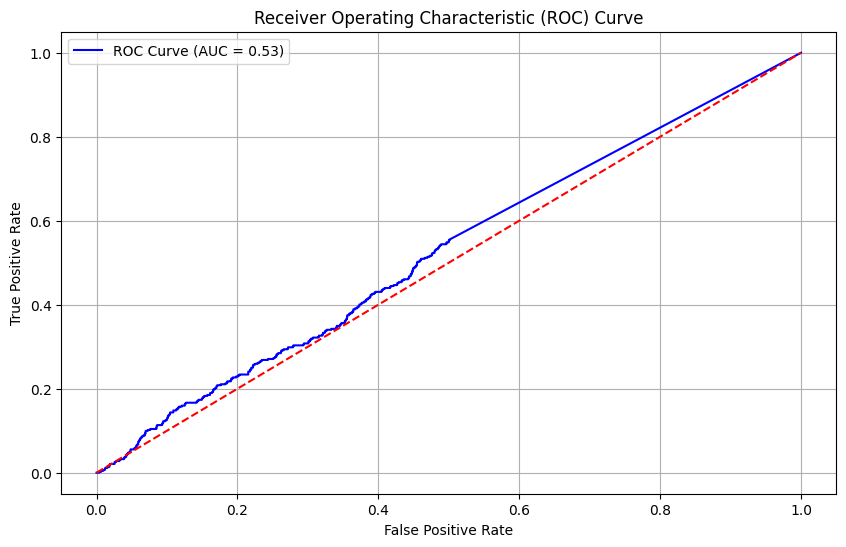

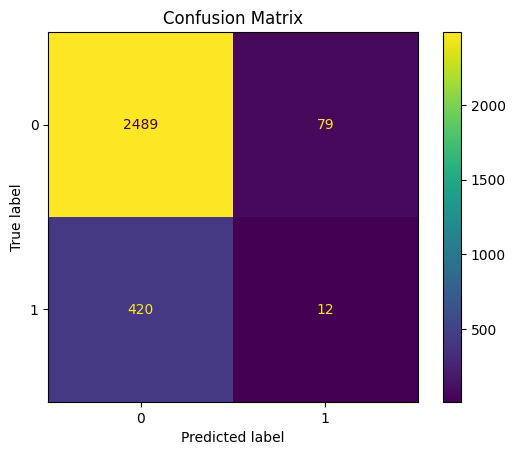

In [101]:
# Calculate ROC curve and AUC score
y_pred_prob = final_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#logistic

In [102]:
# Create a Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Create a pipeline with a preprocessor and Logistic Regression model
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logreg)
])

# Define the hyperparameter grid
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2', 'elasticnet'],
    'classifier__solver': ['saga']  # saga solver supports l1, l2, and elasticnet
}


# Use GridSearchCV to find the best hyperparameter combination
grid_search = GridSearchCV(logreg_pipeline, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)


# Output the best hyperparameter combination
print("Best hyperparameters for Logistic Regression:", grid_search.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-----------------------------------------------

Best hyperparameters for Logistic Regression: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}


/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [103]:
# Build the final Logistic Regression model using the best hyperparameters
final_classifier = LogisticRegression(
    C=grid_search.best_params_['classifier__C'],
    penalty=grid_search.best_params_['classifier__penalty'],
    solver=grid_search.best_params_['classifier__solver'],
    max_iter=1000
)

# Build the final pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', final_classifier)
])

# Train the final model
final_pipeline.fit(X_train, y_train)

# Predict on the test set
pred = final_pipeline.predict(X_test)
probs = final_pipeline.predict_proba(X_test)

# Evaluate model performance
test_accuracy = accuracy_score(y_test, pred)
test_f1 = f1_score(y_test, pred, average='weighted')
test_precision = precision_score(y_test, pred, average='weighted')
test_recall = recall_score(y_test, pred, average='weighted')

print(f"Final Model Test Accuracy: {test_accuracy}")
print(f"Final Model Test F1 Score: {test_f1}")
print(f"Final Model Test Precision: {test_precision}")
print(f"Final Model Test Recall: {test_recall}")

Final Model Test Accuracy: 0.8556666666666667
Final Model Test F1 Score: 0.7894205137416921
Final Model Test Precision: 0.7326948982994331
Final Model Test Recall: 0.8556666666666667


/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
Logistic Regression Mean Accuracy: 0.8611428571428572
Logistic Regression Mean Recall: 0.8611428571428572
Logistic Regression Mean Precision: 0.8173910120832504
Logistic Regression Mean F1 Score: 0.7986399032494778

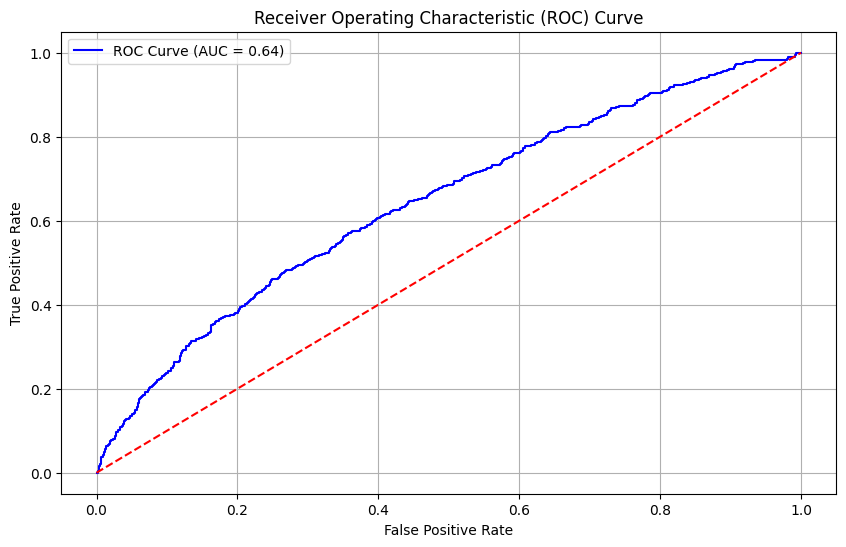

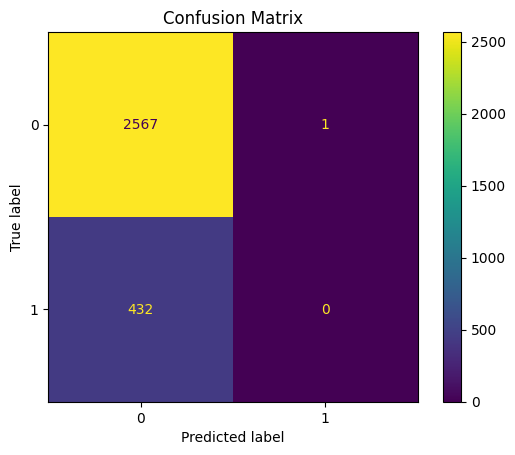

In [104]:
# Calculate ROC curve and AUC score
y_pred_prob = final_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()


In [ ]:
## Naive Bayes 

In [105]:
# Define the Naive Bayes model
nb_model = GaussianNB()

# Create a pipeline with a preprocessor and Naive Bayes model
nb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', nb_model)
])


# Define the hyperparameter grid
param_grid = {
    'classifier__var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]
}


# Use GridSearchCV to find the best hyperparameter combination
grid_search = GridSearchCV(nb_pipeline, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

# Output the best hyperparameter combination
print("Best hyperparameters for Naive Bayes:", grid_search.best_params_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best hyperparameters for Naive Bayes: {'classifier__var_smoothing': 1e-09}


In [106]:
# Build the final Naive Bayes model using the best hyperparameters
final_classifier = GaussianNB(var_smoothing=grid_search.best_params_['classifier__var_smoothing'])

# Build the final pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', final_classifier)
])

# Train the final model
final_pipeline.fit(X_train, y_train)

# Predict on the test set
pred = final_pipeline.predict(X_test)
probs = final_pipeline.predict_proba(X_test)

# Evaluate model performance
test_accuracy = accuracy_score(y_test, pred)
test_f1 = f1_score(y_test, pred, average='weighted')
test_precision = precision_score(y_test, pred, average='weighted')
test_recall = recall_score(y_test, pred, average='weighted')

print(f"Final Model Test Accuracy: {test_accuracy}")
print(f"Final Model Test F1 Score: {test_f1}")
print(f"Final Model Test Precision: {test_precision}")
print(f"Final Model Test Recall: {test_recall}")

Final Model Test Accuracy: 0.854
Final Model Test F1 Score: 0.7885911542610572
Final Model Test Precision: 0.7324889779559118
Final Model Test Recall: 0.854


In [ ]:
Naive Bayes Mean Accuracy: 0.8615714285714284
Naive Bayes Mean Recall: 0.8615714285714284
Naive Bayes Mean Precision: 0.7697397692038189
Naive Bayes Mean F1 Score: 0.7977855820523836

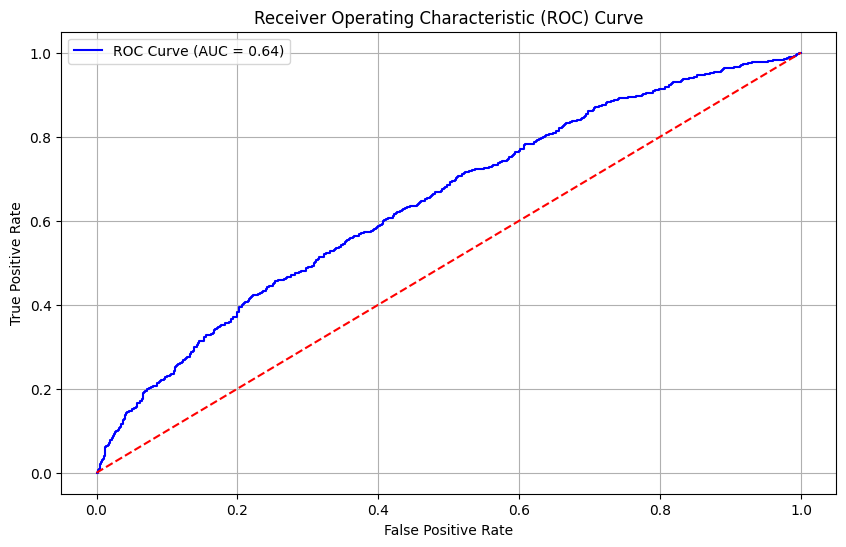

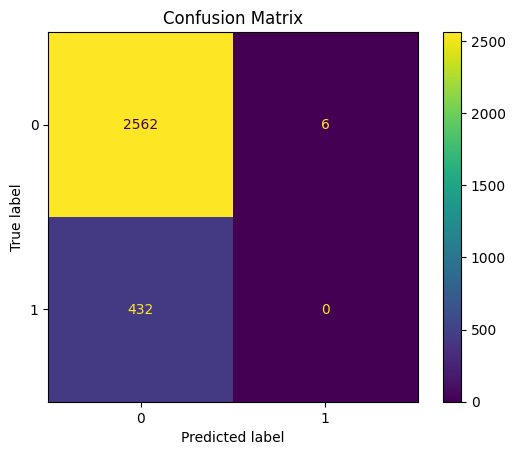

In [107]:
# Calculate ROC curve and AUC score
y_pred_prob = final_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()

In [ ]:
##decision tree

In [113]:
# Create a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Create a pipeline with a preprocessor and Decision Tree model
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', dt)
])

# Define the hyperparameter grid
param_grid = {
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

# Use GridSearchCV to find the best hyperparameter combination
grid_search_dt = GridSearchCV(dt_pipeline, param_grid, cv=5, verbose=1, scoring='f1')
grid_search_dt.fit(X_train, y_train)

# Output the best hyperparameter combination
print("Best hyperparameters for Decision Tree:", grid_search_dt.best_params_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best hyperparameters for Decision Tree: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10}


In [114]:
# Build the final Decision Tree model using the best hyperparameters
final_dt_classifier = DecisionTreeClassifier(
    max_depth=grid_search_dt.best_params_['classifier__max_depth'],
    min_samples_split=grid_search_dt.best_params_['classifier__min_samples_split'],
    min_samples_leaf=grid_search_dt.best_params_['classifier__min_samples_leaf'],
    criterion=grid_search_dt.best_params_['classifier__criterion'],
    random_state=42
)

# Build the final pipeline
final_dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', final_dt_classifier)
])

# Train the final model
final_dt_pipeline.fit(X_train, y_train)

# Predict on the test set
pred_dt = final_dt_pipeline.predict(X_test)
probs_dt = final_dt_pipeline.predict_proba(X_test)


In [115]:
# Evaluate model performance
dt_test_accuracy = accuracy_score(y_test, pred_dt)
dt_test_f1 = f1_score(y_test, pred_dt, average='weighted')
dt_test_precision = precision_score(y_test, pred_dt, average='weighted')
dt_test_recall = recall_score(y_test, pred_dt, average='weighted')

print(f"Final Decision Tree Model Test Accuracy: {dt_test_accuracy}")
print(f"Final Decision Tree Model Test F1 Score: {dt_test_f1}")
print(f"Final Decision Tree Model Test Precision: {dt_test_precision}")
print(f"Final Decision Tree Model Test Recall: {dt_test_recall}")


Final Decision Tree Model Test Accuracy: 0.764
Final Decision Tree Model Test F1 Score: 0.762847571292953
Final Decision Tree Model Test Precision: 0.7617074700620269
Final Decision Tree Model Test Recall: 0.764


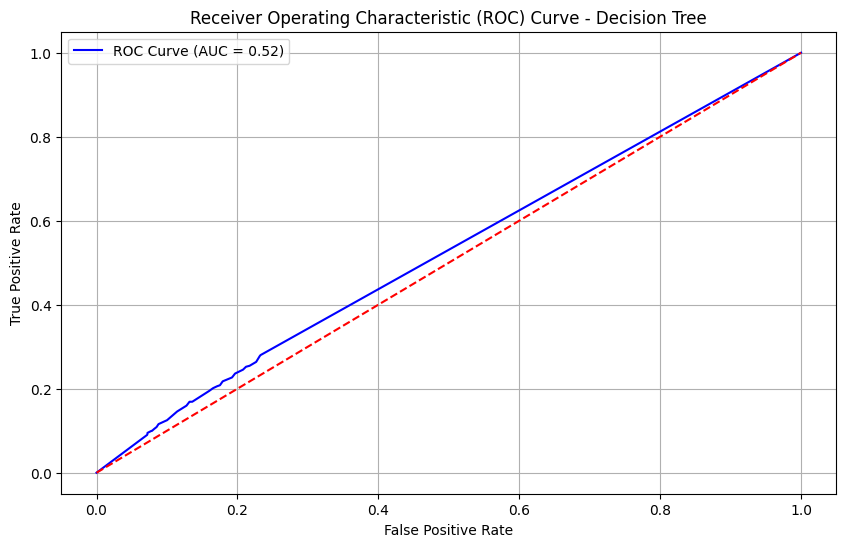

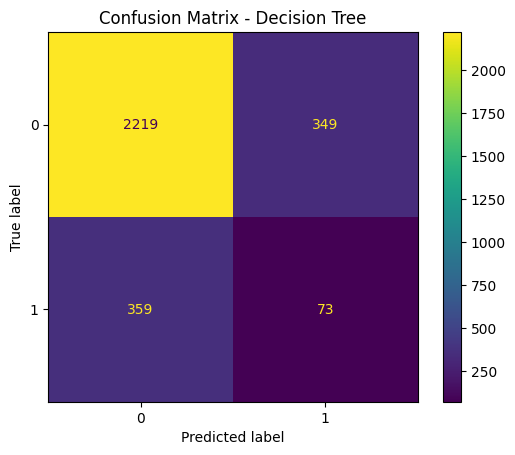

In [116]:
# Calculate ROC curve and AUC score
y_pred_prob_dt = final_dt_pipeline.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_prob_dt)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', label=f'ROC Curve (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend()
plt.grid()
plt.show()

# Plot confusion matrix
conf_matrix_dt = confusion_matrix(y_test, pred_dt)
ConfusionMatrixDisplay(conf_matrix_dt).plot()
plt.title('Confusion Matrix - Decision Tree')
plt.show()
